# Feature Extraction

In [6]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_peaks, corner_harris,
                             plot_matches, BRIEF, ORB)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [7]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

In [8]:
# Loading the images for the exercise
image_signals = rgb2gray(data.imread('img/señales.jpeg'))

catalogo_signals = rgb2gray(data.imread('img/catalogoSeñales.jpg'))

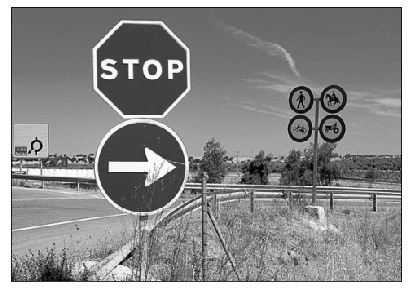

In [9]:
imshow(image_signals)

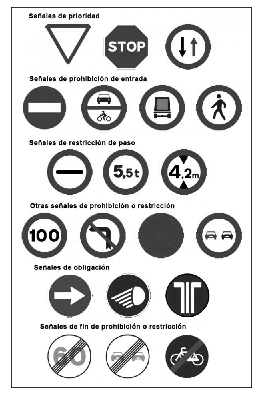

In [10]:
imshow(catalogo_signals)

In [11]:
min_distance=20
keypoints_image_signals = corner_peaks(corner_harris(image_signals), min_distance=min_distance)
keypoints_catalogo_signals = corner_peaks(corner_harris(catalogo_signals), min_distance=min_distance)

In [12]:
keypoints_image_signals

array([[ 71, 150],
       [ 82, 199],
       [105, 355],
       [117, 396],
       [152, 399],
       [179,  31],
       [190,  78],
       [190, 167],
       [190, 282],
       [197, 201],
       [202, 120],
       [214, 282],
       [230, 333],
       [230, 369],
       [232, 448],
       [235, 233],
       [236, 298],
       [236, 395],
       [304, 341],
       [315,  89],
       [315, 133]])

In [13]:
# Using BRIEF for feature extraction
extractor = BRIEF()

# Extracting features for the first image
extractor.extract(image_signals, keypoints_image_signals)
keypoints_image_signals = keypoints_image_signals[extractor.mask]
descriptors_image_signals = extractor.descriptors

In [14]:
descriptors_image_signals

array([[False, False,  True, ...,  True, False,  True],
       [ True, False,  True, ...,  True, False,  True],
       [False, False,  True, ...,  True, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True, False,  True, ..., False,  True,  True],
       [ True, False,  True, ..., False,  True,  True]])

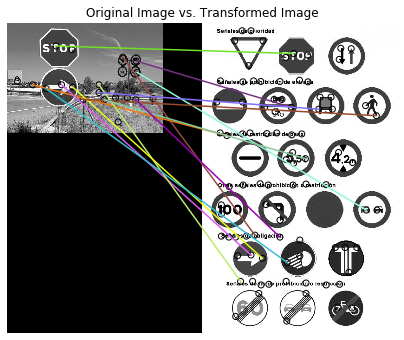

In [15]:
# Extracting the features for the second image
extractor.extract(catalogo_signals, keypoints_catalogo_signals)
keypoints_catalogo_signals = keypoints_catalogo_signals[extractor.mask]
descriptors_catalogo_signals = extractor.descriptors

matchesBothSignals = match_descriptors(descriptors_image_signals, descriptors_catalogo_signals, cross_check=True)

fig, ax = plt.subplots(figsize=(7, 7))

plot_matches(ax, image_signals, catalogo_signals, keypoints_image_signals, keypoints_catalogo_signals, matchesBothSignals)
ax.axis('off')
ax.set_title("Original Image vs. Transformed Image")

plt.show()

# Check if a brand appears in the background of a game

This time using ORB

In [16]:
# Loading the cocacola image
cocacola = rgb2gray(data.imread('img/cocacola.png'))

# Loading the catalog of bran
partido = rgb2gray(data.imread('img/partido.jpg'))

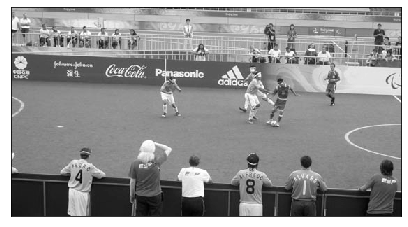

In [17]:
imshow(partido)

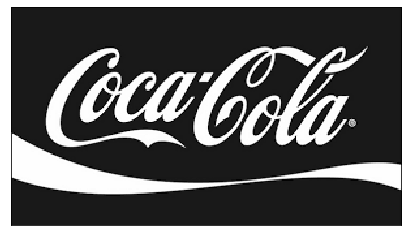

In [18]:
imshow(cocacola)

In [19]:
# Using ORB for feature extraction
extractor = ORB(n_keypoints=50)

extractor.detect_and_extract(cocacola)
keypoints_cocacola = extractor.keypoints
descriptors_cocacola = extractor.descriptors

In [20]:
keypoints_cocacola

array([[ 98. , 229. ],
       [ 80. , 126. ],
       [ 35. , 253. ],
       [ 98. , 243. ],
       [ 73. , 247. ],
       [ 55. , 131. ],
       [ 83. , 205. ],
       [ 82. , 193. ],
       [ 80. , 113. ],
       [ 64. ,  70. ],
       [ 83. , 200. ],
       [ 57. , 145. ],
       [ 40. , 232. ],
       [ 68. ,  76. ],
       [ 37. ,  79. ],
       [ 50. , 241. ],
       [ 68. ,  82. ],
       [102. , 232. ],
       [100. , 218. ],
       [ 70. , 257. ],
       [ 52. , 140. ],
       [107. , 105. ],
       [ 85. , 115. ],
       [ 70. , 139. ],
       [ 97.2, 229.2],
       [ 98. , 186. ],
       [ 64. ,  78. ],
       [ 52. , 153. ],
       [ 98. , 213. ],
       [ 73. , 176. ],
       [ 87. , 204. ],
       [ 63. , 104. ],
       [ 87. , 198. ],
       [ 55.2, 129.6],
       [ 69.6, 256.8],
       [ 58. , 184. ],
       [ 73.2, 246. ],
       [ 45. , 227. ],
       [ 56.4, 145.2],
       [ 55. ,  80. ],
       [ 39.6, 231.6],
       [ 80. ,  64. ],
       [ 79.2, 112.8],
       [ 46

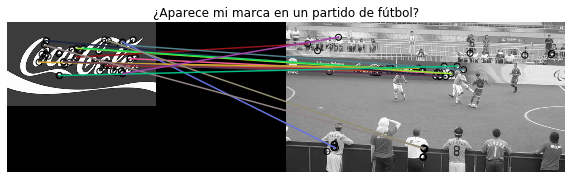

In [21]:
extractor.detect_and_extract(partido)
keypoints_partido = extractor.keypoints
descriptors_partido = extractor.descriptors

matchesBothImages = match_descriptors(descriptors_cocacola, descriptors_partido, cross_check=True)

fig, ax = plt.subplots(figsize=(10, 10))

plot_matches(ax, cocacola, partido, keypoints_cocacola, keypoints_partido, matchesBothImages)
ax.axis('off')
ax.set_title("Is the cocacola brand in the background?")

plt.show()